# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Comparision of Model
7. Conclusion

In [3]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [4]:
#Loading data into dataframe

data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [5]:
#Shape of dataframe

data.shape

(11054, 32)

In [6]:
#Listing the features of the dataset

data.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

In [8]:
# nunique value in columns

data.nunique()

Index                  11054
UsingIP                    2
LongURL                    3
ShortURL                   2
Symbol@                    2
Redirecting//              2
PrefixSuffix-              2
SubDomains                 3
HTTPS                      3
DomainRegLen               2
Favicon                    2
NonStdPort                 2
HTTPSDomainURL             2
RequestURL                 2
AnchorURL                  3
LinksInScriptTags          3
ServerFormHandler          3
InfoEmail                  2
AbnormalURL                2
WebsiteForwarding          2
StatusBarCust              2
DisableRightClick          2
UsingPopupWindow           2
IframeRedirection          2
AgeofDomain                2
DNSRecording               2
WebsiteTraffic             3
PageRank                   2
GoogleIndex                2
LinksPointingToPage        3
StatsReport                2
class                      2
dtype: int64

In [9]:
#droping index column

data = data.drop(['Index'],axis = 1)

In [10]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
UsingIP,11054.0,0.313914,0.949495,-1.0,-1.0,1.0,1.0,1.0
LongURL,11054.0,-0.633345,0.765973,-1.0,-1.0,-1.0,-1.0,1.0
ShortURL,11054.0,0.738737,0.674024,-1.0,1.0,1.0,1.0,1.0
Symbol@,11054.0,0.700561,0.713625,-1.0,1.0,1.0,1.0,1.0
Redirecting//,11054.0,0.741632,0.670837,-1.0,1.0,1.0,1.0,1.0
PrefixSuffix-,11054.0,-0.734938,0.678165,-1.0,-1.0,-1.0,-1.0,1.0
SubDomains,11054.0,0.064049,0.817492,-1.0,-1.0,0.0,1.0,1.0
HTTPS,11054.0,0.251040,0.911856,-1.0,-1.0,1.0,1.0,1.0
DomainRegLen,11054.0,-0.336711,0.941651,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11054.0,0.628551,0.777804,-1.0,1.0,1.0,1.0,1.0


data_set.append(9 OBSERVATIONS:
1. There are 11054 instances and 31 fearures in dataset.
2. Out of which 30 are independent features where as 1 is dependent feature.
3. Each feature is in int datatype, so there is no need to use LabelEncoder.
4. There is no outlier present in dataset.
5. There is no missing value in dataset.

## 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

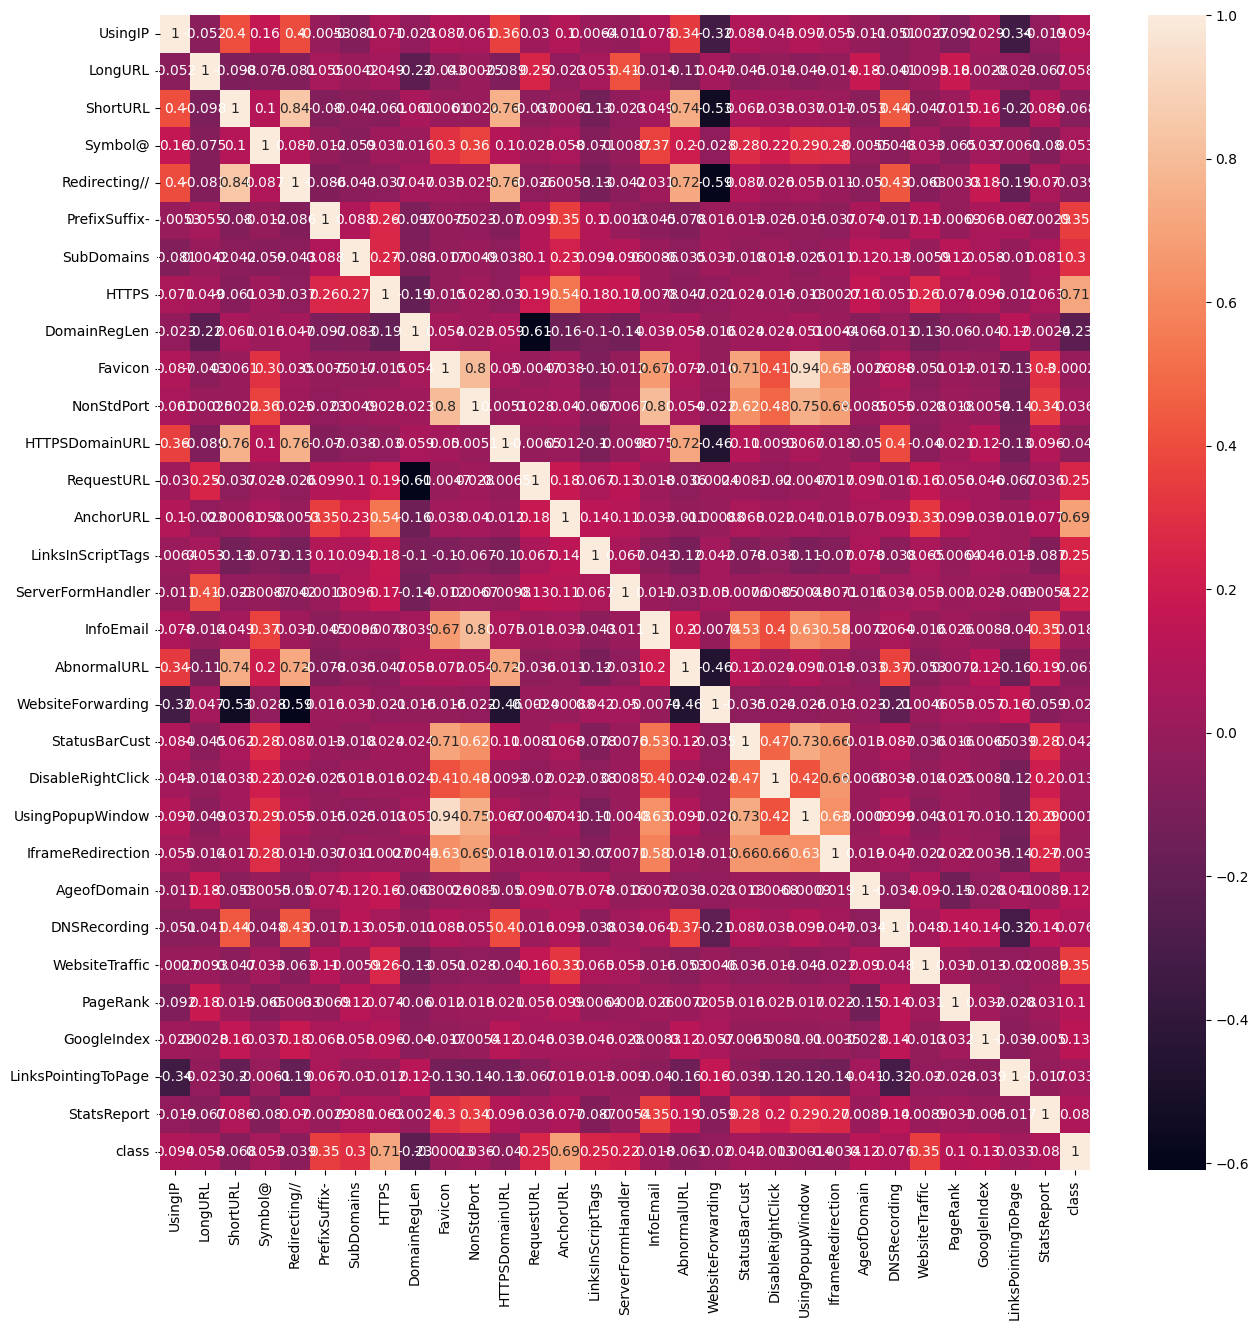

In [11]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

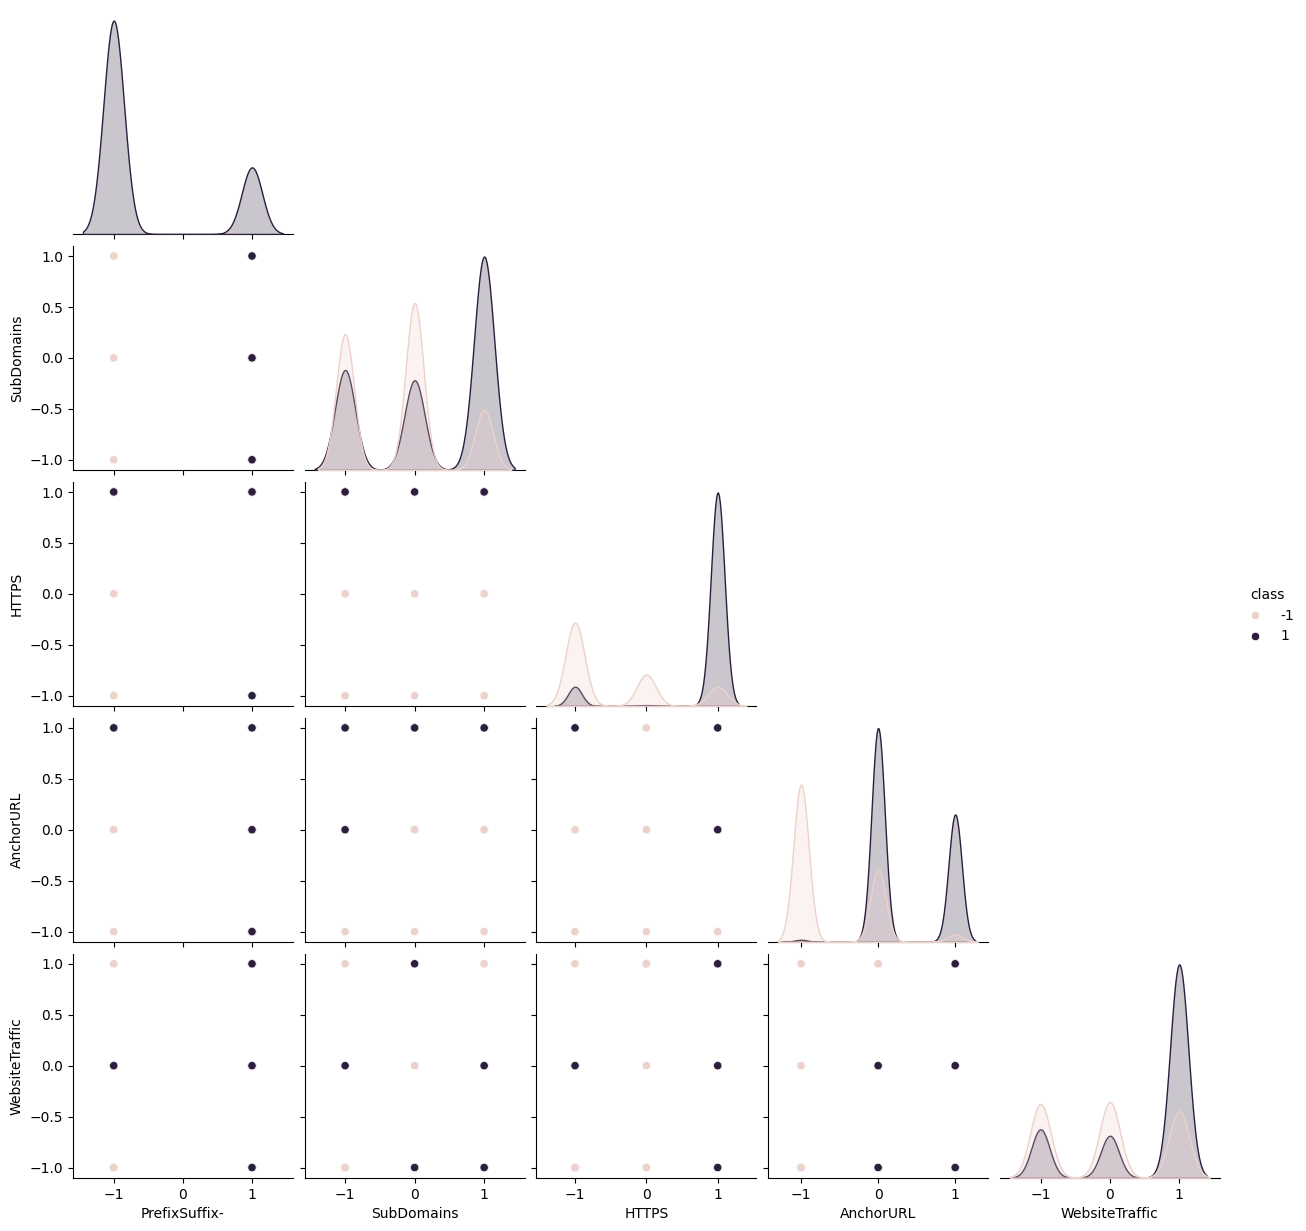

In [12]:
#pairplot for particular features

df = data[['PrefixSuffix-', 'SubDomains', 'HTTPS','AnchorURL','WebsiteTraffic','class']]
sns.pairplot(data = df,hue="class",corner=True);


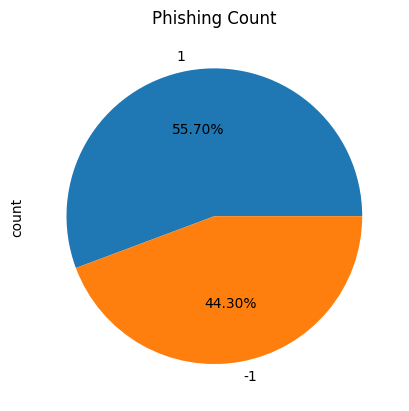

In [13]:
# Phishing Count in pie chart

data['class'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

## 4. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [14]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["class"],axis =1)
y = data["class"]

In [15]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8843, 30), (8843,), (2211, 30), (2211,))

## 5. Model Building & Training:
   Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

   There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

1. Logistic Regression
2. k-Nearest Neighbors 
3. Support Vector Clasifier
4. Naive Bayes
5. Decision Tree
6. Random Forest
7. Gradient Boosting
8. Catboost
9. Xgboost
10. Multilayer Perceptrons

              
  The metrics considered to evaluate the model performance are Accuracy & F1 score.

In [16]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [17]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [18]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [19]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.927
Logistic Regression : Accuracy on test Data: 0.934

Logistic Regression : f1_score on training Data: 0.935
Logistic Regression : f1_score on test Data: 0.941

Logistic Regression : Recall on training Data: 0.943
Logistic Regression : Recall on test Data: 0.953

Logistic Regression : precision on training Data: 0.927
Logistic Regression : precision on test Data: 0.930


In [20]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92       976
           1       0.93      0.95      0.94      1235

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [21]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [22]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [24]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.989
K-Nearest Neighbors : Accuracy on test Data: 0.956

K-Nearest Neighbors : f1_score on training Data: 0.990
K-Nearest Neighbors : f1_score on test Data: 0.961

K-Nearest Neighborsn : Recall on training Data: 0.991
Logistic Regression : Recall on test Data: 0.962

K-Nearest Neighbors : precision on training Data: 0.989
K-Nearest Neighbors : precision on test Data: 0.960


In [25]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       976
           1       0.96      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



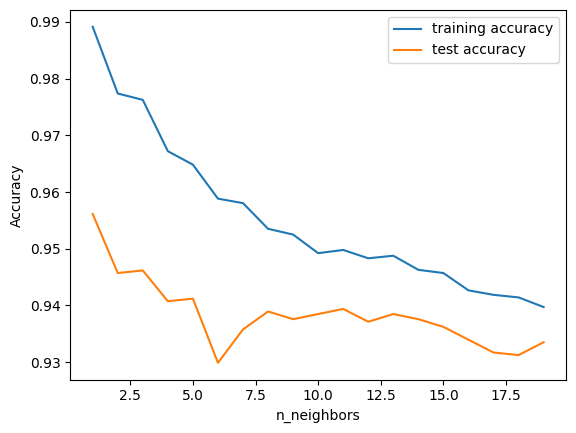

In [26]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [27]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [28]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [29]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [30]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.969
Support Vector Machine : Accuracy on test Data: 0.964

Support Vector Machine : f1_score on training Data: 0.973
Support Vector Machine : f1_score on test Data: 0.968

Support Vector Machine : Recall on training Data: 0.980
Support Vector Machine : Recall on test Data: 0.980

Support Vector Machine : precision on training Data: 0.965
Support Vector Machine : precision on test Data: 0.957


In [31]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [32]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [33]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [34]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [35]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.605
Naive Bayes Classifier : Accuracy on test Data: 0.605

Naive Bayes Classifier : f1_score on training Data: 0.451
Naive Bayes Classifier : f1_score on test Data: 0.454

Naive Bayes Classifier : Recall on training Data: 0.292
Naive Bayes Classifier : Recall on test Data: 0.294

Naive Bayes Classifier : precision on training Data: 0.997
Naive Bayes Classifier : precision on test Data: 0.995


In [36]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

          -1       0.97      0.94      0.96       976
           1       0.96      0.98      0.97      1235

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [37]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [38]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [39]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [40]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.991
Decision Tree : Accuracy on test Data: 0.959

Decision Tree : f1_score on training Data: 0.992
Decision Tree : f1_score on test Data: 0.963

Decision Tree : Recall on training Data: 0.991
Decision Tree : Recall on test Data: 0.961

Decision Tree : precision on training Data: 0.993
Decision Tree : precision on test Data: 0.965


In [41]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

          -1       0.95      0.96      0.95       976
           1       0.97      0.96      0.96      1235

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



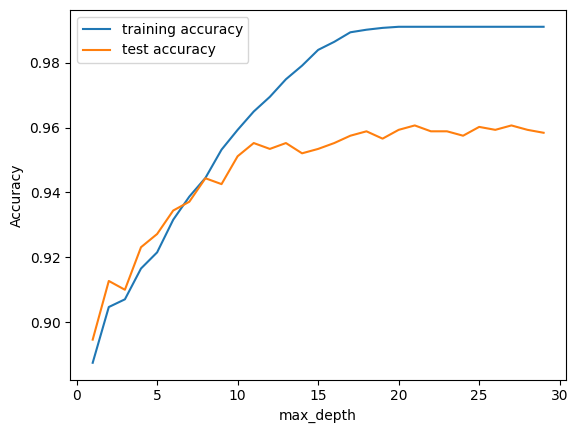

In [42]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [43]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [44]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [45]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [46]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.991
Random Forest : Accuracy on test Data: 0.969

Random Forest : f1_score on training Data: 0.992
Random Forest : f1_score on test Data: 0.972

Random Forest : Recall on training Data: 0.994
Random Forest : Recall on test Data: 0.977

Random Forest : precision on training Data: 0.989
Random Forest : precision on test Data: 0.965


In [47]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96       976
           1       0.97      0.98      0.97      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



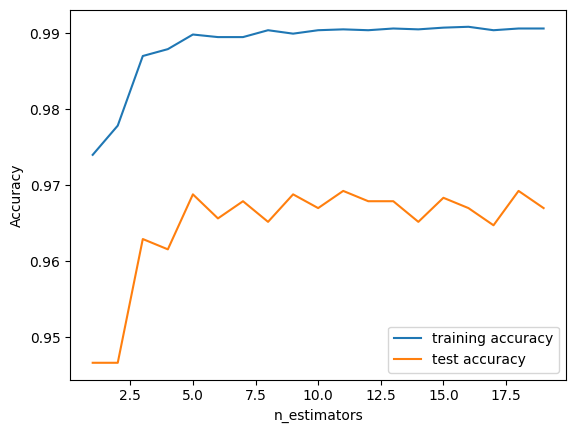

In [48]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [50]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [51]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [52]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.989
Gradient Boosting Classifier : Accuracy on test Data: 0.974

Gradient Boosting Classifier : f1_score on training Data: 0.990
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.994
Gradient Boosting Classifier : Recall on test Data: 0.989

Gradient Boosting Classifier : precision on training Data: 0.986
Gradient Boosting Classifier : precision on test Data: 0.966


In [53]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.96      0.97       976
           1       0.97      0.99      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.98      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



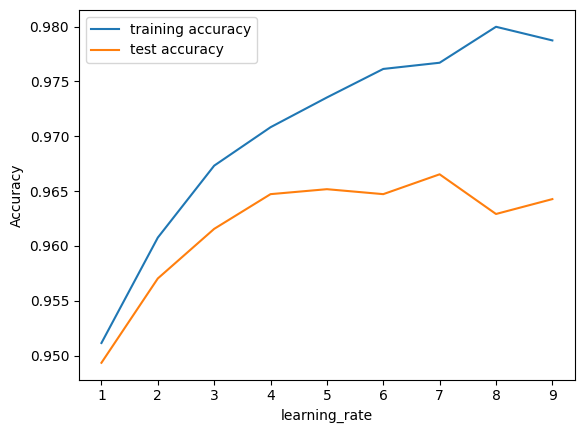

In [54]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

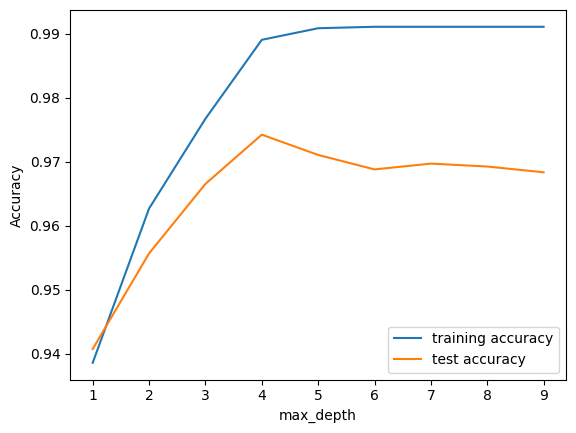

In [55]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [56]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [59]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

CatBoost Classifier : Accuracy on training Data: 0.991
CatBoost Classifier : Accuracy on test Data: 0.972

CatBoost Classifier : f1_score on training Data: 0.992
CatBoost Classifier : f1_score on test Data: 0.975

CatBoost Classifier : Recall on training Data: 0.994
CatBoost Classifier : Recall on test Data: 0.982

CatBoost Classifier : precision on training Data: 0.989
CatBoost Classifier : precision on test Data: 0.969


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       976
           1       0.97      0.98      0.98      1235

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5487232	total: 8.02ms	remaining: 8.02s
1:	learn: 0.4349357	total: 21.3ms	remaining: 10.6s
2:	learn: 0.3609236	total: 35.8ms	remaining: 11.9s
3:	learn: 0.3050829	total: 42.6ms	remaining: 10.6s
4:	learn: 0.2766620	total: 51.4ms	remaining: 10.2s
5:	learn: 0.2475476	total: 58.3ms	remaining: 9.65s
6:	learn: 0.2286637	total: 66.9ms	remaining: 9.5s
7:	learn: 0.2138754	total: 72ms	remaining: 8.92s
8:	learn: 0.2013643	total: 77.6ms	remaining: 8.54s
9:	learn: 0.1896378	total: 82.4ms	remaining: 8.16s
10:	learn: 0.1819539	total: 88.8ms	remaining: 7.98s
11:	learn: 0.1767867	total: 93.7ms	remaining: 7.72s
12:	learn: 0.1727735	total: 98.9ms	remaining: 7.51s
13:	learn: 0.1682578	total: 105ms	remaining: 7.38s
14:	learn: 0.1641759	total: 110ms	remaining: 7.22s
15:	learn: 0.1614218	total: 115ms	remaining: 7.09s
16:	learn: 0.1558968	total: 120ms	remaining: 6.95s
17:	learn: 0.1535881	total: 127ms	remaining: 6.93s
18:	learn: 0.1514228	total: 132ms	remaining: 6.81s
19:	learn: 0.1482580	total: 137

167:	learn: 0.0547805	total: 968ms	remaining: 4.79s
168:	learn: 0.0546642	total: 973ms	remaining: 4.79s
169:	learn: 0.0543574	total: 979ms	remaining: 4.78s
170:	learn: 0.0542539	total: 985ms	remaining: 4.78s
171:	learn: 0.0540977	total: 991ms	remaining: 4.77s
172:	learn: 0.0539741	total: 996ms	remaining: 4.76s
173:	learn: 0.0537793	total: 1s	remaining: 4.75s
174:	learn: 0.0535499	total: 1.01s	remaining: 4.74s
175:	learn: 0.0533461	total: 1.01s	remaining: 4.74s
176:	learn: 0.0531326	total: 1.02s	remaining: 4.73s
177:	learn: 0.0530595	total: 1.02s	remaining: 4.72s
178:	learn: 0.0529470	total: 1.03s	remaining: 4.72s
179:	learn: 0.0527691	total: 1.04s	remaining: 4.73s
180:	learn: 0.0526404	total: 1.04s	remaining: 4.73s
181:	learn: 0.0525145	total: 1.05s	remaining: 4.73s
182:	learn: 0.0524332	total: 1.06s	remaining: 4.72s
183:	learn: 0.0522311	total: 1.06s	remaining: 4.72s
184:	learn: 0.0519353	total: 1.07s	remaining: 4.71s
185:	learn: 0.0515714	total: 1.08s	remaining: 4.71s
186:	learn: 0.0

348:	learn: 0.0349414	total: 2s	remaining: 3.73s
349:	learn: 0.0349034	total: 2.01s	remaining: 3.73s
350:	learn: 0.0348012	total: 2.01s	remaining: 3.72s
351:	learn: 0.0347637	total: 2.02s	remaining: 3.72s
352:	learn: 0.0347316	total: 2.02s	remaining: 3.71s
353:	learn: 0.0346767	total: 2.03s	remaining: 3.71s
354:	learn: 0.0346415	total: 2.04s	remaining: 3.7s
355:	learn: 0.0345842	total: 2.04s	remaining: 3.69s
356:	learn: 0.0344702	total: 2.05s	remaining: 3.69s
357:	learn: 0.0343870	total: 2.05s	remaining: 3.68s
358:	learn: 0.0343532	total: 2.06s	remaining: 3.68s
359:	learn: 0.0342877	total: 2.06s	remaining: 3.67s
360:	learn: 0.0341769	total: 2.07s	remaining: 3.66s
361:	learn: 0.0341559	total: 2.08s	remaining: 3.66s
362:	learn: 0.0340802	total: 2.08s	remaining: 3.65s
363:	learn: 0.0340117	total: 2.09s	remaining: 3.65s
364:	learn: 0.0339431	total: 2.09s	remaining: 3.64s
365:	learn: 0.0338809	total: 2.1s	remaining: 3.63s
366:	learn: 0.0338159	total: 2.1s	remaining: 3.63s
367:	learn: 0.0337

512:	learn: 0.0281211	total: 2.9s	remaining: 2.75s
513:	learn: 0.0280864	total: 2.91s	remaining: 2.75s
514:	learn: 0.0280602	total: 2.91s	remaining: 2.74s
515:	learn: 0.0280478	total: 2.92s	remaining: 2.74s
516:	learn: 0.0280324	total: 2.92s	remaining: 2.73s
517:	learn: 0.0279982	total: 2.93s	remaining: 2.73s
518:	learn: 0.0279833	total: 2.93s	remaining: 2.72s
519:	learn: 0.0279698	total: 2.94s	remaining: 2.71s
520:	learn: 0.0279248	total: 2.94s	remaining: 2.71s
521:	learn: 0.0279247	total: 2.95s	remaining: 2.7s
522:	learn: 0.0279247	total: 2.96s	remaining: 2.7s
523:	learn: 0.0279246	total: 2.96s	remaining: 2.69s
524:	learn: 0.0279246	total: 2.96s	remaining: 2.68s
525:	learn: 0.0279246	total: 2.97s	remaining: 2.68s
526:	learn: 0.0279246	total: 2.97s	remaining: 2.67s
527:	learn: 0.0279147	total: 2.98s	remaining: 2.66s
528:	learn: 0.0279106	total: 2.98s	remaining: 2.66s
529:	learn: 0.0278729	total: 2.99s	remaining: 2.65s
530:	learn: 0.0278476	total: 3s	remaining: 2.65s
531:	learn: 0.0278

687:	learn: 0.0254868	total: 3.84s	remaining: 1.74s
688:	learn: 0.0254851	total: 3.85s	remaining: 1.74s
689:	learn: 0.0254850	total: 3.85s	remaining: 1.73s
690:	learn: 0.0254850	total: 3.86s	remaining: 1.73s
691:	learn: 0.0254850	total: 3.86s	remaining: 1.72s
692:	learn: 0.0254850	total: 3.87s	remaining: 1.71s
693:	learn: 0.0254849	total: 3.87s	remaining: 1.71s
694:	learn: 0.0254782	total: 3.88s	remaining: 1.7s
695:	learn: 0.0254732	total: 3.88s	remaining: 1.7s
696:	learn: 0.0254529	total: 3.89s	remaining: 1.69s
697:	learn: 0.0254256	total: 3.89s	remaining: 1.68s
698:	learn: 0.0253999	total: 3.9s	remaining: 1.68s
699:	learn: 0.0253999	total: 3.9s	remaining: 1.67s
700:	learn: 0.0253998	total: 3.91s	remaining: 1.67s
701:	learn: 0.0253997	total: 3.91s	remaining: 1.66s
702:	learn: 0.0253997	total: 3.92s	remaining: 1.66s
703:	learn: 0.0253733	total: 3.92s	remaining: 1.65s
704:	learn: 0.0253579	total: 3.93s	remaining: 1.64s
705:	learn: 0.0253419	total: 3.94s	remaining: 1.64s
706:	learn: 0.02

853:	learn: 0.0248534	total: 4.66s	remaining: 796ms
854:	learn: 0.0248533	total: 4.66s	remaining: 791ms
855:	learn: 0.0248532	total: 4.67s	remaining: 785ms
856:	learn: 0.0248533	total: 4.67s	remaining: 779ms
857:	learn: 0.0248532	total: 4.67s	remaining: 774ms
858:	learn: 0.0248532	total: 4.68s	remaining: 768ms
859:	learn: 0.0248532	total: 4.68s	remaining: 762ms
860:	learn: 0.0248532	total: 4.69s	remaining: 757ms
861:	learn: 0.0248332	total: 4.69s	remaining: 751ms
862:	learn: 0.0248332	total: 4.7s	remaining: 746ms
863:	learn: 0.0248203	total: 4.7s	remaining: 740ms
864:	learn: 0.0248183	total: 4.71s	remaining: 735ms
865:	learn: 0.0247978	total: 4.71s	remaining: 729ms
866:	learn: 0.0247848	total: 4.72s	remaining: 724ms
867:	learn: 0.0247847	total: 4.72s	remaining: 718ms
868:	learn: 0.0247848	total: 4.73s	remaining: 713ms
869:	learn: 0.0247847	total: 4.73s	remaining: 707ms
870:	learn: 0.0247847	total: 4.74s	remaining: 702ms
871:	learn: 0.0247846	total: 4.74s	remaining: 696ms
872:	learn: 0.

16:	learn: 0.1209822	total: 211ms	remaining: 12.2s
17:	learn: 0.1190487	total: 223ms	remaining: 12.2s
18:	learn: 0.1172151	total: 236ms	remaining: 12.2s
19:	learn: 0.1153427	total: 248ms	remaining: 12.1s
20:	learn: 0.1133872	total: 260ms	remaining: 12.1s
21:	learn: 0.1109772	total: 272ms	remaining: 12.1s
22:	learn: 0.1095649	total: 284ms	remaining: 12.1s
23:	learn: 0.1092314	total: 292ms	remaining: 11.9s
24:	learn: 0.1076376	total: 304ms	remaining: 11.9s
25:	learn: 0.1063318	total: 316ms	remaining: 11.8s
26:	learn: 0.1048767	total: 328ms	remaining: 11.8s
27:	learn: 0.1035818	total: 342ms	remaining: 11.9s
28:	learn: 0.1016344	total: 354ms	remaining: 11.9s
29:	learn: 0.1004652	total: 366ms	remaining: 11.8s
30:	learn: 0.0985645	total: 379ms	remaining: 11.8s
31:	learn: 0.0968659	total: 391ms	remaining: 11.8s
32:	learn: 0.0956595	total: 405ms	remaining: 11.9s
33:	learn: 0.0944003	total: 417ms	remaining: 11.9s
34:	learn: 0.0934442	total: 425ms	remaining: 11.7s
35:	learn: 0.0923780	total: 432

187:	learn: 0.0333722	total: 1.33s	remaining: 5.75s
188:	learn: 0.0333284	total: 1.34s	remaining: 5.74s
189:	learn: 0.0332685	total: 1.34s	remaining: 5.73s
190:	learn: 0.0330321	total: 1.35s	remaining: 5.71s
191:	learn: 0.0329861	total: 1.35s	remaining: 5.7s
192:	learn: 0.0329163	total: 1.36s	remaining: 5.69s
193:	learn: 0.0328125	total: 1.36s	remaining: 5.67s
194:	learn: 0.0327101	total: 1.37s	remaining: 5.66s
195:	learn: 0.0325932	total: 1.38s	remaining: 5.64s
196:	learn: 0.0324955	total: 1.38s	remaining: 5.63s
197:	learn: 0.0324229	total: 1.39s	remaining: 5.62s
198:	learn: 0.0323780	total: 1.39s	remaining: 5.61s
199:	learn: 0.0321981	total: 1.4s	remaining: 5.59s
200:	learn: 0.0321480	total: 1.4s	remaining: 5.58s
201:	learn: 0.0320666	total: 1.41s	remaining: 5.57s
202:	learn: 0.0318805	total: 1.42s	remaining: 5.56s
203:	learn: 0.0316940	total: 1.42s	remaining: 5.54s
204:	learn: 0.0316015	total: 1.43s	remaining: 5.53s
205:	learn: 0.0315592	total: 1.43s	remaining: 5.52s
206:	learn: 0.0

355:	learn: 0.0254081	total: 2.24s	remaining: 4.05s
356:	learn: 0.0253991	total: 2.24s	remaining: 4.04s
357:	learn: 0.0253721	total: 2.25s	remaining: 4.03s
358:	learn: 0.0253720	total: 2.25s	remaining: 4.02s
359:	learn: 0.0253545	total: 2.26s	remaining: 4.01s
360:	learn: 0.0253507	total: 2.26s	remaining: 4s
361:	learn: 0.0253507	total: 2.27s	remaining: 4s
362:	learn: 0.0253313	total: 2.27s	remaining: 3.99s
363:	learn: 0.0252683	total: 2.28s	remaining: 3.98s
364:	learn: 0.0252043	total: 2.28s	remaining: 3.97s
365:	learn: 0.0252042	total: 2.29s	remaining: 3.96s
366:	learn: 0.0252042	total: 2.29s	remaining: 3.95s
367:	learn: 0.0252041	total: 2.3s	remaining: 3.94s
368:	learn: 0.0252036	total: 2.3s	remaining: 3.94s
369:	learn: 0.0251971	total: 2.31s	remaining: 3.93s
370:	learn: 0.0251696	total: 2.31s	remaining: 3.92s
371:	learn: 0.0251414	total: 2.32s	remaining: 3.91s
372:	learn: 0.0251410	total: 2.32s	remaining: 3.9s
373:	learn: 0.0251153	total: 2.33s	remaining: 3.9s
374:	learn: 0.0250939	

542:	learn: 0.0243298	total: 3.13s	remaining: 2.63s
543:	learn: 0.0243297	total: 3.13s	remaining: 2.63s
544:	learn: 0.0243297	total: 3.14s	remaining: 2.62s
545:	learn: 0.0243296	total: 3.14s	remaining: 2.61s
546:	learn: 0.0243295	total: 3.15s	remaining: 2.6s
547:	learn: 0.0243295	total: 3.15s	remaining: 2.6s
548:	learn: 0.0243295	total: 3.15s	remaining: 2.59s
549:	learn: 0.0243295	total: 3.16s	remaining: 2.58s
550:	learn: 0.0243295	total: 3.16s	remaining: 2.58s
551:	learn: 0.0243294	total: 3.17s	remaining: 2.57s
552:	learn: 0.0243293	total: 3.17s	remaining: 2.56s
553:	learn: 0.0243292	total: 3.18s	remaining: 2.56s
554:	learn: 0.0243292	total: 3.18s	remaining: 2.55s
555:	learn: 0.0243292	total: 3.19s	remaining: 2.54s
556:	learn: 0.0243283	total: 3.19s	remaining: 2.54s
557:	learn: 0.0243283	total: 3.19s	remaining: 2.53s
558:	learn: 0.0243283	total: 3.2s	remaining: 2.52s
559:	learn: 0.0243283	total: 3.2s	remaining: 2.52s
560:	learn: 0.0243282	total: 3.21s	remaining: 2.51s
561:	learn: 0.02

729:	learn: 0.0241331	total: 4.03s	remaining: 1.49s
730:	learn: 0.0241331	total: 4.03s	remaining: 1.48s
731:	learn: 0.0241321	total: 4.04s	remaining: 1.48s
732:	learn: 0.0241321	total: 4.04s	remaining: 1.47s
733:	learn: 0.0241321	total: 4.04s	remaining: 1.47s
734:	learn: 0.0241320	total: 4.05s	remaining: 1.46s
735:	learn: 0.0241320	total: 4.05s	remaining: 1.45s
736:	learn: 0.0241320	total: 4.06s	remaining: 1.45s
737:	learn: 0.0241320	total: 4.06s	remaining: 1.44s
738:	learn: 0.0241319	total: 4.07s	remaining: 1.44s
739:	learn: 0.0241319	total: 4.07s	remaining: 1.43s
740:	learn: 0.0241318	total: 4.08s	remaining: 1.42s
741:	learn: 0.0241318	total: 4.08s	remaining: 1.42s
742:	learn: 0.0241315	total: 4.08s	remaining: 1.41s
743:	learn: 0.0241314	total: 4.09s	remaining: 1.41s
744:	learn: 0.0241314	total: 4.09s	remaining: 1.4s
745:	learn: 0.0241314	total: 4.1s	remaining: 1.4s
746:	learn: 0.0241313	total: 4.1s	remaining: 1.39s
747:	learn: 0.0241313	total: 4.11s	remaining: 1.38s
748:	learn: 0.02

918:	learn: 0.0238352	total: 4.93s	remaining: 434ms
919:	learn: 0.0238351	total: 4.93s	remaining: 429ms
920:	learn: 0.0238351	total: 4.93s	remaining: 423ms
921:	learn: 0.0238350	total: 4.94s	remaining: 418ms
922:	learn: 0.0238350	total: 4.95s	remaining: 413ms
923:	learn: 0.0238349	total: 4.95s	remaining: 407ms
924:	learn: 0.0238350	total: 4.96s	remaining: 402ms
925:	learn: 0.0238349	total: 4.96s	remaining: 396ms
926:	learn: 0.0238348	total: 4.96s	remaining: 391ms
927:	learn: 0.0238349	total: 4.97s	remaining: 386ms
928:	learn: 0.0238348	total: 4.97s	remaining: 380ms
929:	learn: 0.0238348	total: 4.98s	remaining: 375ms
930:	learn: 0.0238348	total: 4.98s	remaining: 369ms
931:	learn: 0.0238348	total: 4.99s	remaining: 364ms
932:	learn: 0.0238348	total: 4.99s	remaining: 358ms
933:	learn: 0.0238348	total: 5s	remaining: 353ms
934:	learn: 0.0238347	total: 5s	remaining: 348ms
935:	learn: 0.0238347	total: 5.01s	remaining: 342ms
936:	learn: 0.0238346	total: 5.01s	remaining: 337ms
937:	learn: 0.0238

98:	learn: 0.0390838	total: 547ms	remaining: 4.97s
99:	learn: 0.0386776	total: 552ms	remaining: 4.97s
100:	learn: 0.0385757	total: 558ms	remaining: 4.96s
101:	learn: 0.0383143	total: 564ms	remaining: 4.97s
102:	learn: 0.0378483	total: 569ms	remaining: 4.96s
103:	learn: 0.0376271	total: 575ms	remaining: 4.95s
104:	learn: 0.0375072	total: 580ms	remaining: 4.94s
105:	learn: 0.0372283	total: 585ms	remaining: 4.93s
106:	learn: 0.0371664	total: 590ms	remaining: 4.92s
107:	learn: 0.0370348	total: 596ms	remaining: 4.92s
108:	learn: 0.0368266	total: 601ms	remaining: 4.91s
109:	learn: 0.0363859	total: 606ms	remaining: 4.91s
110:	learn: 0.0360549	total: 612ms	remaining: 4.9s
111:	learn: 0.0356858	total: 617ms	remaining: 4.89s
112:	learn: 0.0354427	total: 623ms	remaining: 4.89s
113:	learn: 0.0352698	total: 629ms	remaining: 4.89s
114:	learn: 0.0351955	total: 634ms	remaining: 4.88s
115:	learn: 0.0350369	total: 640ms	remaining: 4.87s
116:	learn: 0.0348385	total: 645ms	remaining: 4.87s
117:	learn: 0.0

270:	learn: 0.0246762	total: 1.45s	remaining: 3.9s
271:	learn: 0.0246371	total: 1.46s	remaining: 3.9s
272:	learn: 0.0245955	total: 1.46s	remaining: 3.89s
273:	learn: 0.0245379	total: 1.47s	remaining: 3.89s
274:	learn: 0.0245378	total: 1.47s	remaining: 3.88s
275:	learn: 0.0245377	total: 1.48s	remaining: 3.87s
276:	learn: 0.0245377	total: 1.48s	remaining: 3.86s
277:	learn: 0.0245377	total: 1.48s	remaining: 3.85s
278:	learn: 0.0245376	total: 1.49s	remaining: 3.84s
279:	learn: 0.0245376	total: 1.49s	remaining: 3.83s
280:	learn: 0.0245376	total: 1.49s	remaining: 3.82s
281:	learn: 0.0245376	total: 1.49s	remaining: 3.81s
282:	learn: 0.0245376	total: 1.5s	remaining: 3.79s
283:	learn: 0.0245375	total: 1.5s	remaining: 3.78s
284:	learn: 0.0245376	total: 1.5s	remaining: 3.77s
285:	learn: 0.0245376	total: 1.51s	remaining: 3.76s
286:	learn: 0.0245376	total: 1.51s	remaining: 3.75s
287:	learn: 0.0245376	total: 1.51s	remaining: 3.74s
288:	learn: 0.0245266	total: 1.52s	remaining: 3.73s
289:	learn: 0.024

449:	learn: 0.0239625	total: 2.17s	remaining: 2.66s
450:	learn: 0.0239624	total: 2.18s	remaining: 2.65s
451:	learn: 0.0239619	total: 2.18s	remaining: 2.65s
452:	learn: 0.0239616	total: 2.19s	remaining: 2.64s
453:	learn: 0.0239617	total: 2.19s	remaining: 2.64s
454:	learn: 0.0239608	total: 2.2s	remaining: 2.63s
455:	learn: 0.0239296	total: 2.2s	remaining: 2.63s
456:	learn: 0.0239295	total: 2.21s	remaining: 2.62s
457:	learn: 0.0239294	total: 2.21s	remaining: 2.62s
458:	learn: 0.0239294	total: 2.22s	remaining: 2.61s
459:	learn: 0.0239293	total: 2.22s	remaining: 2.61s
460:	learn: 0.0239288	total: 2.23s	remaining: 2.6s
461:	learn: 0.0239287	total: 2.23s	remaining: 2.6s
462:	learn: 0.0239287	total: 2.23s	remaining: 2.59s
463:	learn: 0.0239285	total: 2.24s	remaining: 2.59s
464:	learn: 0.0239283	total: 2.24s	remaining: 2.58s
465:	learn: 0.0239283	total: 2.25s	remaining: 2.58s
466:	learn: 0.0239282	total: 2.25s	remaining: 2.57s
467:	learn: 0.0239281	total: 2.26s	remaining: 2.57s
468:	learn: 0.02

609:	learn: 0.0234332	total: 2.89s	remaining: 1.85s
610:	learn: 0.0234332	total: 2.9s	remaining: 1.84s
611:	learn: 0.0234331	total: 2.9s	remaining: 1.84s
612:	learn: 0.0234331	total: 2.9s	remaining: 1.83s
613:	learn: 0.0234330	total: 2.91s	remaining: 1.83s
614:	learn: 0.0234329	total: 2.91s	remaining: 1.82s
615:	learn: 0.0234329	total: 2.92s	remaining: 1.82s
616:	learn: 0.0234329	total: 2.92s	remaining: 1.81s
617:	learn: 0.0234329	total: 2.93s	remaining: 1.81s
618:	learn: 0.0234328	total: 2.93s	remaining: 1.8s
619:	learn: 0.0234328	total: 2.94s	remaining: 1.8s
620:	learn: 0.0234327	total: 2.94s	remaining: 1.79s
621:	learn: 0.0234326	total: 2.94s	remaining: 1.79s
622:	learn: 0.0234325	total: 2.95s	remaining: 1.78s
623:	learn: 0.0234324	total: 2.95s	remaining: 1.78s
624:	learn: 0.0234324	total: 2.96s	remaining: 1.77s
625:	learn: 0.0234324	total: 2.96s	remaining: 1.77s
626:	learn: 0.0234322	total: 2.97s	remaining: 1.76s
627:	learn: 0.0234323	total: 2.97s	remaining: 1.76s
628:	learn: 0.023

790:	learn: 0.0232187	total: 3.77s	remaining: 995ms
791:	learn: 0.0232186	total: 3.77s	remaining: 990ms
792:	learn: 0.0232185	total: 3.78s	remaining: 986ms
793:	learn: 0.0232184	total: 3.78s	remaining: 981ms
794:	learn: 0.0232183	total: 3.79s	remaining: 976ms
795:	learn: 0.0232183	total: 3.79s	remaining: 971ms
796:	learn: 0.0232182	total: 3.79s	remaining: 967ms
797:	learn: 0.0232182	total: 3.8s	remaining: 962ms
798:	learn: 0.0232182	total: 3.8s	remaining: 957ms
799:	learn: 0.0232182	total: 3.81s	remaining: 952ms
800:	learn: 0.0232181	total: 3.81s	remaining: 947ms
801:	learn: 0.0232181	total: 3.82s	remaining: 943ms
802:	learn: 0.0232181	total: 3.82s	remaining: 938ms
803:	learn: 0.0232181	total: 3.83s	remaining: 933ms
804:	learn: 0.0232180	total: 3.83s	remaining: 928ms
805:	learn: 0.0232180	total: 3.83s	remaining: 923ms
806:	learn: 0.0232179	total: 3.84s	remaining: 918ms
807:	learn: 0.0232179	total: 3.84s	remaining: 914ms
808:	learn: 0.0232179	total: 3.85s	remaining: 909ms
809:	learn: 0.

984:	learn: 0.0230622	total: 4.68s	remaining: 71.2ms
985:	learn: 0.0230622	total: 4.68s	remaining: 66.5ms
986:	learn: 0.0230621	total: 4.68s	remaining: 61.7ms
987:	learn: 0.0230620	total: 4.69s	remaining: 57ms
988:	learn: 0.0230620	total: 4.69s	remaining: 52.2ms
989:	learn: 0.0230620	total: 4.7s	remaining: 47.5ms
990:	learn: 0.0230620	total: 4.7s	remaining: 42.7ms
991:	learn: 0.0230619	total: 4.71s	remaining: 38ms
992:	learn: 0.0230619	total: 4.71s	remaining: 33.2ms
993:	learn: 0.0230617	total: 4.72s	remaining: 28.5ms
994:	learn: 0.0230615	total: 4.72s	remaining: 23.7ms
995:	learn: 0.0230614	total: 4.73s	remaining: 19ms
996:	learn: 0.0230613	total: 4.73s	remaining: 14.2ms
997:	learn: 0.0230613	total: 4.74s	remaining: 9.49ms
998:	learn: 0.0230612	total: 4.74s	remaining: 4.74ms
999:	learn: 0.0230612	total: 4.74s	remaining: 0us
0:	learn: 0.3401688	total: 4.77ms	remaining: 4.76s
1:	learn: 0.2187862	total: 12.1ms	remaining: 6.04s
2:	learn: 0.1818483	total: 22.2ms	remaining: 7.37s
3:	learn: 

166:	learn: 0.0247469	total: 908ms	remaining: 4.53s
167:	learn: 0.0247468	total: 912ms	remaining: 4.52s
168:	learn: 0.0247467	total: 917ms	remaining: 4.51s
169:	learn: 0.0247466	total: 922ms	remaining: 4.5s
170:	learn: 0.0247466	total: 927ms	remaining: 4.49s
171:	learn: 0.0247464	total: 931ms	remaining: 4.48s
172:	learn: 0.0247463	total: 936ms	remaining: 4.47s
173:	learn: 0.0247462	total: 940ms	remaining: 4.46s
174:	learn: 0.0247459	total: 945ms	remaining: 4.46s
175:	learn: 0.0247456	total: 950ms	remaining: 4.45s
176:	learn: 0.0247454	total: 955ms	remaining: 4.44s
177:	learn: 0.0247454	total: 960ms	remaining: 4.43s
178:	learn: 0.0247450	total: 964ms	remaining: 4.42s
179:	learn: 0.0247106	total: 969ms	remaining: 4.42s
180:	learn: 0.0246386	total: 974ms	remaining: 4.41s
181:	learn: 0.0245975	total: 980ms	remaining: 4.41s
182:	learn: 0.0245651	total: 986ms	remaining: 4.4s
183:	learn: 0.0244842	total: 991ms	remaining: 4.39s
184:	learn: 0.0244204	total: 996ms	remaining: 4.39s
185:	learn: 0.

356:	learn: 0.0223190	total: 1.81s	remaining: 3.25s
357:	learn: 0.0223188	total: 1.81s	remaining: 3.25s
358:	learn: 0.0223188	total: 1.81s	remaining: 3.24s
359:	learn: 0.0223186	total: 1.82s	remaining: 3.24s
360:	learn: 0.0223185	total: 1.82s	remaining: 3.23s
361:	learn: 0.0223185	total: 1.83s	remaining: 3.22s
362:	learn: 0.0223184	total: 1.83s	remaining: 3.22s
363:	learn: 0.0223184	total: 1.84s	remaining: 3.21s
364:	learn: 0.0223184	total: 1.84s	remaining: 3.21s
365:	learn: 0.0223182	total: 1.85s	remaining: 3.2s
366:	learn: 0.0223181	total: 1.85s	remaining: 3.19s
367:	learn: 0.0223179	total: 1.86s	remaining: 3.19s
368:	learn: 0.0223178	total: 1.86s	remaining: 3.18s
369:	learn: 0.0223179	total: 1.86s	remaining: 3.18s
370:	learn: 0.0223178	total: 1.87s	remaining: 3.17s
371:	learn: 0.0223176	total: 1.88s	remaining: 3.17s
372:	learn: 0.0223175	total: 1.88s	remaining: 3.16s
373:	learn: 0.0223163	total: 1.88s	remaining: 3.15s
374:	learn: 0.0223080	total: 1.89s	remaining: 3.15s
375:	learn: 0

543:	learn: 0.0222636	total: 2.7s	remaining: 2.26s
544:	learn: 0.0222636	total: 2.7s	remaining: 2.26s
545:	learn: 0.0222635	total: 2.71s	remaining: 2.25s
546:	learn: 0.0222635	total: 2.71s	remaining: 2.25s
547:	learn: 0.0222633	total: 2.72s	remaining: 2.24s
548:	learn: 0.0222633	total: 2.72s	remaining: 2.23s
549:	learn: 0.0222632	total: 2.73s	remaining: 2.23s
550:	learn: 0.0222631	total: 2.73s	remaining: 2.23s
551:	learn: 0.0222631	total: 2.74s	remaining: 2.22s
552:	learn: 0.0222631	total: 2.74s	remaining: 2.21s
553:	learn: 0.0222630	total: 2.75s	remaining: 2.21s
554:	learn: 0.0222629	total: 2.75s	remaining: 2.2s
555:	learn: 0.0222630	total: 2.75s	remaining: 2.2s
556:	learn: 0.0222628	total: 2.76s	remaining: 2.19s
557:	learn: 0.0222627	total: 2.76s	remaining: 2.19s
558:	learn: 0.0222627	total: 2.77s	remaining: 2.18s
559:	learn: 0.0222626	total: 2.77s	remaining: 2.18s
560:	learn: 0.0222626	total: 2.78s	remaining: 2.17s
561:	learn: 0.0222626	total: 2.78s	remaining: 2.17s
562:	learn: 0.02

732:	learn: 0.0220179	total: 3.6s	remaining: 1.31s
733:	learn: 0.0220179	total: 3.6s	remaining: 1.3s
734:	learn: 0.0220178	total: 3.61s	remaining: 1.3s
735:	learn: 0.0220178	total: 3.61s	remaining: 1.29s
736:	learn: 0.0220178	total: 3.62s	remaining: 1.29s
737:	learn: 0.0220177	total: 3.62s	remaining: 1.28s
738:	learn: 0.0220176	total: 3.62s	remaining: 1.28s
739:	learn: 0.0220176	total: 3.63s	remaining: 1.27s
740:	learn: 0.0220176	total: 3.63s	remaining: 1.27s
741:	learn: 0.0220175	total: 3.64s	remaining: 1.26s
742:	learn: 0.0220168	total: 3.64s	remaining: 1.26s
743:	learn: 0.0219087	total: 3.65s	remaining: 1.25s
744:	learn: 0.0218663	total: 3.65s	remaining: 1.25s
745:	learn: 0.0218655	total: 3.66s	remaining: 1.25s
746:	learn: 0.0218655	total: 3.66s	remaining: 1.24s
747:	learn: 0.0218652	total: 3.67s	remaining: 1.24s
748:	learn: 0.0218652	total: 3.67s	remaining: 1.23s
749:	learn: 0.0218650	total: 3.68s	remaining: 1.23s
750:	learn: 0.0218651	total: 3.68s	remaining: 1.22s
751:	learn: 0.02

917:	learn: 0.0217342	total: 4.48s	remaining: 400ms
918:	learn: 0.0217336	total: 4.48s	remaining: 395ms
919:	learn: 0.0217336	total: 4.49s	remaining: 390ms
920:	learn: 0.0217336	total: 4.49s	remaining: 385ms
921:	learn: 0.0217336	total: 4.5s	remaining: 381ms
922:	learn: 0.0217335	total: 4.5s	remaining: 376ms
923:	learn: 0.0217334	total: 4.51s	remaining: 371ms
924:	learn: 0.0217334	total: 4.51s	remaining: 366ms
925:	learn: 0.0217334	total: 4.52s	remaining: 361ms
926:	learn: 0.0217333	total: 4.52s	remaining: 356ms
927:	learn: 0.0217332	total: 4.53s	remaining: 351ms
928:	learn: 0.0217332	total: 4.53s	remaining: 346ms
929:	learn: 0.0217332	total: 4.54s	remaining: 341ms
930:	learn: 0.0217329	total: 4.54s	remaining: 337ms
931:	learn: 0.0217329	total: 4.54s	remaining: 332ms
932:	learn: 0.0217328	total: 4.55s	remaining: 327ms
933:	learn: 0.0217328	total: 4.55s	remaining: 322ms
934:	learn: 0.0217328	total: 4.56s	remaining: 317ms
935:	learn: 0.0217327	total: 4.56s	remaining: 312ms
936:	learn: 0.

95:	learn: 0.0280685	total: 538ms	remaining: 5.07s
96:	learn: 0.0279867	total: 544ms	remaining: 5.06s
97:	learn: 0.0277896	total: 549ms	remaining: 5.05s
98:	learn: 0.0276222	total: 554ms	remaining: 5.04s
99:	learn: 0.0275290	total: 559ms	remaining: 5.03s
100:	learn: 0.0273501	total: 564ms	remaining: 5.02s
101:	learn: 0.0272879	total: 570ms	remaining: 5.02s
102:	learn: 0.0271559	total: 575ms	remaining: 5.01s
103:	learn: 0.0267868	total: 580ms	remaining: 5s
104:	learn: 0.0267638	total: 585ms	remaining: 4.99s
105:	learn: 0.0266350	total: 590ms	remaining: 4.98s
106:	learn: 0.0264669	total: 595ms	remaining: 4.97s
107:	learn: 0.0263977	total: 601ms	remaining: 4.96s
108:	learn: 0.0262674	total: 606ms	remaining: 4.96s
109:	learn: 0.0261657	total: 612ms	remaining: 4.95s
110:	learn: 0.0260787	total: 617ms	remaining: 4.94s
111:	learn: 0.0259209	total: 622ms	remaining: 4.93s
112:	learn: 0.0257717	total: 628ms	remaining: 4.93s
113:	learn: 0.0257716	total: 632ms	remaining: 4.91s
114:	learn: 0.025658

280:	learn: 0.0223428	total: 1.44s	remaining: 3.68s
281:	learn: 0.0223427	total: 1.44s	remaining: 3.67s
282:	learn: 0.0222779	total: 1.45s	remaining: 3.68s
283:	learn: 0.0222778	total: 1.46s	remaining: 3.67s
284:	learn: 0.0222776	total: 1.46s	remaining: 3.66s
285:	learn: 0.0222774	total: 1.47s	remaining: 3.66s
286:	learn: 0.0222365	total: 1.47s	remaining: 3.65s
287:	learn: 0.0222054	total: 1.48s	remaining: 3.65s
288:	learn: 0.0222052	total: 1.48s	remaining: 3.64s
289:	learn: 0.0221634	total: 1.49s	remaining: 3.64s
290:	learn: 0.0221633	total: 1.49s	remaining: 3.63s
291:	learn: 0.0221632	total: 1.5s	remaining: 3.63s
292:	learn: 0.0221630	total: 1.5s	remaining: 3.62s
293:	learn: 0.0221207	total: 1.5s	remaining: 3.62s
294:	learn: 0.0221204	total: 1.51s	remaining: 3.61s
295:	learn: 0.0221201	total: 1.51s	remaining: 3.6s
296:	learn: 0.0221198	total: 1.52s	remaining: 3.59s
297:	learn: 0.0221197	total: 1.52s	remaining: 3.59s
298:	learn: 0.0221196	total: 1.53s	remaining: 3.58s
299:	learn: 0.02

470:	learn: 0.0216002	total: 2.33s	remaining: 2.62s
471:	learn: 0.0216001	total: 2.34s	remaining: 2.62s
472:	learn: 0.0216001	total: 2.34s	remaining: 2.61s
473:	learn: 0.0216001	total: 2.35s	remaining: 2.6s
474:	learn: 0.0216000	total: 2.35s	remaining: 2.6s
475:	learn: 0.0216000	total: 2.36s	remaining: 2.59s
476:	learn: 0.0215999	total: 2.36s	remaining: 2.59s
477:	learn: 0.0215999	total: 2.37s	remaining: 2.58s
478:	learn: 0.0215997	total: 2.37s	remaining: 2.58s
479:	learn: 0.0215997	total: 2.38s	remaining: 2.57s
480:	learn: 0.0215995	total: 2.38s	remaining: 2.57s
481:	learn: 0.0215993	total: 2.38s	remaining: 2.56s
482:	learn: 0.0215992	total: 2.39s	remaining: 2.56s
483:	learn: 0.0215990	total: 2.39s	remaining: 2.55s
484:	learn: 0.0215988	total: 2.4s	remaining: 2.55s
485:	learn: 0.0215988	total: 2.4s	remaining: 2.54s
486:	learn: 0.0215986	total: 2.41s	remaining: 2.54s
487:	learn: 0.0215985	total: 2.41s	remaining: 2.53s
488:	learn: 0.0215985	total: 2.42s	remaining: 2.52s
489:	learn: 0.02

657:	learn: 0.0214393	total: 3.23s	remaining: 1.68s
658:	learn: 0.0214393	total: 3.23s	remaining: 1.67s
659:	learn: 0.0214391	total: 3.24s	remaining: 1.67s
660:	learn: 0.0214390	total: 3.24s	remaining: 1.66s
661:	learn: 0.0214387	total: 3.25s	remaining: 1.66s
662:	learn: 0.0214385	total: 3.25s	remaining: 1.65s
663:	learn: 0.0214385	total: 3.26s	remaining: 1.65s
664:	learn: 0.0214384	total: 3.26s	remaining: 1.64s
665:	learn: 0.0214384	total: 3.27s	remaining: 1.64s
666:	learn: 0.0214382	total: 3.27s	remaining: 1.63s
667:	learn: 0.0214381	total: 3.28s	remaining: 1.63s
668:	learn: 0.0214380	total: 3.28s	remaining: 1.62s
669:	learn: 0.0214378	total: 3.29s	remaining: 1.62s
670:	learn: 0.0214378	total: 3.29s	remaining: 1.61s
671:	learn: 0.0214377	total: 3.3s	remaining: 1.61s
672:	learn: 0.0214375	total: 3.3s	remaining: 1.6s
673:	learn: 0.0214375	total: 3.31s	remaining: 1.6s
674:	learn: 0.0214373	total: 3.31s	remaining: 1.59s
675:	learn: 0.0214372	total: 3.31s	remaining: 1.59s
676:	learn: 0.02

854:	learn: 0.0214183	total: 4.16s	remaining: 706ms
855:	learn: 0.0214183	total: 4.17s	remaining: 701ms
856:	learn: 0.0214183	total: 4.17s	remaining: 696ms
857:	learn: 0.0214182	total: 4.17s	remaining: 691ms
858:	learn: 0.0214181	total: 4.18s	remaining: 686ms
859:	learn: 0.0214179	total: 4.18s	remaining: 681ms
860:	learn: 0.0214179	total: 4.19s	remaining: 676ms
861:	learn: 0.0214179	total: 4.19s	remaining: 671ms
862:	learn: 0.0214178	total: 4.2s	remaining: 666ms
863:	learn: 0.0214178	total: 4.2s	remaining: 662ms
864:	learn: 0.0214178	total: 4.21s	remaining: 657ms
865:	learn: 0.0214178	total: 4.21s	remaining: 652ms
866:	learn: 0.0214178	total: 4.22s	remaining: 647ms
867:	learn: 0.0214177	total: 4.22s	remaining: 642ms
868:	learn: 0.0214173	total: 4.23s	remaining: 637ms
869:	learn: 0.0214173	total: 4.23s	remaining: 632ms
870:	learn: 0.0214172	total: 4.24s	remaining: 627ms
871:	learn: 0.0214172	total: 4.24s	remaining: 622ms
872:	learn: 0.0214171	total: 4.25s	remaining: 618ms
873:	learn: 0.

27:	learn: 0.0559183	total: 190ms	remaining: 6.59s
28:	learn: 0.0539578	total: 195ms	remaining: 6.54s
29:	learn: 0.0529788	total: 200ms	remaining: 6.48s
30:	learn: 0.0521946	total: 206ms	remaining: 6.44s
31:	learn: 0.0510624	total: 211ms	remaining: 6.39s
32:	learn: 0.0505527	total: 217ms	remaining: 6.35s
33:	learn: 0.0494553	total: 222ms	remaining: 6.3s
34:	learn: 0.0489136	total: 227ms	remaining: 6.26s
35:	learn: 0.0479491	total: 232ms	remaining: 6.22s
36:	learn: 0.0471861	total: 237ms	remaining: 6.18s
37:	learn: 0.0463702	total: 242ms	remaining: 6.14s
38:	learn: 0.0458764	total: 248ms	remaining: 6.11s
39:	learn: 0.0453984	total: 253ms	remaining: 6.07s
40:	learn: 0.0445309	total: 259ms	remaining: 6.05s
41:	learn: 0.0439038	total: 264ms	remaining: 6.02s
42:	learn: 0.0433624	total: 269ms	remaining: 5.99s
43:	learn: 0.0424474	total: 274ms	remaining: 5.96s
44:	learn: 0.0419903	total: 280ms	remaining: 5.93s
45:	learn: 0.0413042	total: 285ms	remaining: 5.91s
46:	learn: 0.0404885	total: 291m

203:	learn: 0.0229298	total: 1.09s	remaining: 4.24s
204:	learn: 0.0229292	total: 1.09s	remaining: 4.24s
205:	learn: 0.0229287	total: 1.1s	remaining: 4.23s
206:	learn: 0.0228692	total: 1.1s	remaining: 4.22s
207:	learn: 0.0228687	total: 1.11s	remaining: 4.22s
208:	learn: 0.0227962	total: 1.11s	remaining: 4.21s
209:	learn: 0.0227961	total: 1.12s	remaining: 4.2s
210:	learn: 0.0227375	total: 1.12s	remaining: 4.2s
211:	learn: 0.0226900	total: 1.13s	remaining: 4.19s
212:	learn: 0.0226358	total: 1.13s	remaining: 4.19s
213:	learn: 0.0225855	total: 1.14s	remaining: 4.18s
214:	learn: 0.0224806	total: 1.14s	remaining: 4.18s
215:	learn: 0.0224805	total: 1.15s	remaining: 4.17s
216:	learn: 0.0224805	total: 1.15s	remaining: 4.16s
217:	learn: 0.0224805	total: 1.16s	remaining: 4.15s
218:	learn: 0.0224802	total: 1.16s	remaining: 4.14s
219:	learn: 0.0224802	total: 1.17s	remaining: 4.13s
220:	learn: 0.0224802	total: 1.17s	remaining: 4.13s
221:	learn: 0.0224798	total: 1.18s	remaining: 4.12s
222:	learn: 0.02

394:	learn: 0.0209632	total: 1.99s	remaining: 3.05s
395:	learn: 0.0209631	total: 1.99s	remaining: 3.04s
396:	learn: 0.0209627	total: 2s	remaining: 3.04s
397:	learn: 0.0209625	total: 2s	remaining: 3.03s
398:	learn: 0.0209622	total: 2.01s	remaining: 3.02s
399:	learn: 0.0209621	total: 2.01s	remaining: 3.02s
400:	learn: 0.0209621	total: 2.02s	remaining: 3.01s
401:	learn: 0.0209619	total: 2.02s	remaining: 3.01s
402:	learn: 0.0209612	total: 2.03s	remaining: 3s
403:	learn: 0.0209612	total: 2.03s	remaining: 3s
404:	learn: 0.0209611	total: 2.04s	remaining: 2.99s
405:	learn: 0.0209607	total: 2.04s	remaining: 2.98s
406:	learn: 0.0209607	total: 2.04s	remaining: 2.98s
407:	learn: 0.0209606	total: 2.05s	remaining: 2.97s
408:	learn: 0.0209605	total: 2.05s	remaining: 2.97s
409:	learn: 0.0209605	total: 2.06s	remaining: 2.96s
410:	learn: 0.0209605	total: 2.06s	remaining: 2.96s
411:	learn: 0.0209605	total: 2.07s	remaining: 2.96s
412:	learn: 0.0209605	total: 2.08s	remaining: 2.95s
413:	learn: 0.0209599	to

581:	learn: 0.0209442	total: 2.88s	remaining: 2.07s
582:	learn: 0.0209441	total: 2.89s	remaining: 2.07s
583:	learn: 0.0209439	total: 2.89s	remaining: 2.06s
584:	learn: 0.0209439	total: 2.9s	remaining: 2.06s
585:	learn: 0.0209439	total: 2.9s	remaining: 2.05s
586:	learn: 0.0209439	total: 2.91s	remaining: 2.05s
587:	learn: 0.0209438	total: 2.91s	remaining: 2.04s
588:	learn: 0.0209438	total: 2.92s	remaining: 2.04s
589:	learn: 0.0209431	total: 2.92s	remaining: 2.03s
590:	learn: 0.0209431	total: 2.93s	remaining: 2.02s
591:	learn: 0.0209429	total: 2.93s	remaining: 2.02s
592:	learn: 0.0209428	total: 2.94s	remaining: 2.01s
593:	learn: 0.0209426	total: 2.94s	remaining: 2.01s
594:	learn: 0.0209253	total: 2.94s	remaining: 2s
595:	learn: 0.0209252	total: 2.95s	remaining: 2s
596:	learn: 0.0209251	total: 2.95s	remaining: 1.99s
597:	learn: 0.0209250	total: 2.96s	remaining: 1.99s
598:	learn: 0.0209250	total: 2.96s	remaining: 1.98s
599:	learn: 0.0209247	total: 2.97s	remaining: 1.98s
600:	learn: 0.020924

761:	learn: 0.0209105	total: 3.78s	remaining: 1.18s
762:	learn: 0.0209104	total: 3.78s	remaining: 1.18s
763:	learn: 0.0209104	total: 3.79s	remaining: 1.17s
764:	learn: 0.0209104	total: 3.79s	remaining: 1.17s
765:	learn: 0.0209104	total: 3.8s	remaining: 1.16s
766:	learn: 0.0209104	total: 3.8s	remaining: 1.15s
767:	learn: 0.0209104	total: 3.81s	remaining: 1.15s
768:	learn: 0.0209103	total: 3.81s	remaining: 1.14s
769:	learn: 0.0209104	total: 3.81s	remaining: 1.14s
770:	learn: 0.0209103	total: 3.82s	remaining: 1.13s
771:	learn: 0.0209102	total: 3.82s	remaining: 1.13s
772:	learn: 0.0209102	total: 3.83s	remaining: 1.12s
773:	learn: 0.0209101	total: 3.83s	remaining: 1.12s
774:	learn: 0.0209102	total: 3.84s	remaining: 1.11s
775:	learn: 0.0209100	total: 3.84s	remaining: 1.11s
776:	learn: 0.0209099	total: 3.85s	remaining: 1.1s
777:	learn: 0.0209100	total: 3.85s	remaining: 1.1s
778:	learn: 0.0209100	total: 3.86s	remaining: 1.09s
779:	learn: 0.0209100	total: 3.86s	remaining: 1.09s
780:	learn: 0.02

955:	learn: 0.0208967	total: 4.68s	remaining: 216ms
956:	learn: 0.0208966	total: 4.69s	remaining: 211ms
957:	learn: 0.0208965	total: 4.69s	remaining: 206ms
958:	learn: 0.0208964	total: 4.7s	remaining: 201ms
959:	learn: 0.0208963	total: 4.7s	remaining: 196ms
960:	learn: 0.0208960	total: 4.71s	remaining: 191ms
961:	learn: 0.0208959	total: 4.71s	remaining: 186ms
962:	learn: 0.0208959	total: 4.72s	remaining: 181ms
963:	learn: 0.0208951	total: 4.72s	remaining: 176ms
964:	learn: 0.0208951	total: 4.72s	remaining: 171ms
965:	learn: 0.0208951	total: 4.73s	remaining: 166ms
966:	learn: 0.0208949	total: 4.73s	remaining: 162ms
967:	learn: 0.0208949	total: 4.74s	remaining: 157ms
968:	learn: 0.0208948	total: 4.74s	remaining: 152ms
969:	learn: 0.0208947	total: 4.75s	remaining: 147ms
970:	learn: 0.0208947	total: 4.76s	remaining: 142ms
971:	learn: 0.0208947	total: 4.77s	remaining: 137ms
972:	learn: 0.0208946	total: 4.77s	remaining: 132ms
973:	learn: 0.0208946	total: 4.78s	remaining: 127ms
974:	learn: 0.

125:	learn: 0.0218639	total: 732ms	remaining: 5.08s
126:	learn: 0.0218639	total: 737ms	remaining: 5.07s
127:	learn: 0.0218638	total: 741ms	remaining: 5.05s
128:	learn: 0.0218638	total: 747ms	remaining: 5.04s
129:	learn: 0.0218638	total: 751ms	remaining: 5.03s
130:	learn: 0.0218637	total: 756ms	remaining: 5.01s
131:	learn: 0.0218636	total: 760ms	remaining: 5s
132:	learn: 0.0218614	total: 764ms	remaining: 4.98s
133:	learn: 0.0218613	total: 769ms	remaining: 4.97s
134:	learn: 0.0218612	total: 774ms	remaining: 4.96s
135:	learn: 0.0218612	total: 778ms	remaining: 4.94s
136:	learn: 0.0218611	total: 783ms	remaining: 4.93s
137:	learn: 0.0218609	total: 787ms	remaining: 4.92s
138:	learn: 0.0218608	total: 792ms	remaining: 4.9s
139:	learn: 0.0218607	total: 797ms	remaining: 4.89s
140:	learn: 0.0218606	total: 801ms	remaining: 4.88s
141:	learn: 0.0218605	total: 806ms	remaining: 4.87s
142:	learn: 0.0218604	total: 810ms	remaining: 4.85s
143:	learn: 0.0218602	total: 815ms	remaining: 4.84s
144:	learn: 0.02

315:	learn: 0.0211880	total: 1.63s	remaining: 3.52s
316:	learn: 0.0211876	total: 1.63s	remaining: 3.52s
317:	learn: 0.0211876	total: 1.64s	remaining: 3.51s
318:	learn: 0.0211875	total: 1.64s	remaining: 3.51s
319:	learn: 0.0211873	total: 1.65s	remaining: 3.5s
320:	learn: 0.0211872	total: 1.65s	remaining: 3.49s
321:	learn: 0.0211871	total: 1.66s	remaining: 3.49s
322:	learn: 0.0211870	total: 1.66s	remaining: 3.48s
323:	learn: 0.0211869	total: 1.67s	remaining: 3.47s
324:	learn: 0.0211868	total: 1.67s	remaining: 3.47s
325:	learn: 0.0211868	total: 1.67s	remaining: 3.46s
326:	learn: 0.0211863	total: 1.68s	remaining: 3.46s
327:	learn: 0.0211862	total: 1.68s	remaining: 3.45s
328:	learn: 0.0211861	total: 1.69s	remaining: 3.44s
329:	learn: 0.0211861	total: 1.69s	remaining: 3.44s
330:	learn: 0.0211861	total: 1.7s	remaining: 3.43s
331:	learn: 0.0211860	total: 1.7s	remaining: 3.42s
332:	learn: 0.0211859	total: 1.71s	remaining: 3.42s
333:	learn: 0.0211859	total: 1.71s	remaining: 3.41s
334:	learn: 0.0

509:	learn: 0.0209273	total: 2.52s	remaining: 2.42s
510:	learn: 0.0209270	total: 2.53s	remaining: 2.42s
511:	learn: 0.0209271	total: 2.53s	remaining: 2.41s
512:	learn: 0.0209269	total: 2.54s	remaining: 2.41s
513:	learn: 0.0209262	total: 2.54s	remaining: 2.4s
514:	learn: 0.0209260	total: 2.54s	remaining: 2.4s
515:	learn: 0.0209260	total: 2.55s	remaining: 2.39s
516:	learn: 0.0209260	total: 2.55s	remaining: 2.38s
517:	learn: 0.0209259	total: 2.56s	remaining: 2.38s
518:	learn: 0.0209257	total: 2.56s	remaining: 2.37s
519:	learn: 0.0209256	total: 2.57s	remaining: 2.37s
520:	learn: 0.0209256	total: 2.57s	remaining: 2.36s
521:	learn: 0.0209256	total: 2.58s	remaining: 2.36s
522:	learn: 0.0209256	total: 2.58s	remaining: 2.35s
523:	learn: 0.0209256	total: 2.58s	remaining: 2.35s
524:	learn: 0.0209255	total: 2.59s	remaining: 2.34s
525:	learn: 0.0209254	total: 2.59s	remaining: 2.34s
526:	learn: 0.0209253	total: 2.6s	remaining: 2.33s
527:	learn: 0.0209251	total: 2.6s	remaining: 2.33s
528:	learn: 0.02

668:	learn: 0.0209076	total: 3.24s	remaining: 1.6s
669:	learn: 0.0209075	total: 3.25s	remaining: 1.6s
670:	learn: 0.0209074	total: 3.25s	remaining: 1.59s
671:	learn: 0.0209073	total: 3.25s	remaining: 1.59s
672:	learn: 0.0209071	total: 3.26s	remaining: 1.58s
673:	learn: 0.0209070	total: 3.26s	remaining: 1.58s
674:	learn: 0.0209070	total: 3.27s	remaining: 1.57s
675:	learn: 0.0209070	total: 3.27s	remaining: 1.57s
676:	learn: 0.0209069	total: 3.28s	remaining: 1.56s
677:	learn: 0.0209068	total: 3.28s	remaining: 1.56s
678:	learn: 0.0209068	total: 3.29s	remaining: 1.55s
679:	learn: 0.0209067	total: 3.29s	remaining: 1.55s
680:	learn: 0.0209066	total: 3.29s	remaining: 1.54s
681:	learn: 0.0209064	total: 3.3s	remaining: 1.54s
682:	learn: 0.0209064	total: 3.3s	remaining: 1.53s
683:	learn: 0.0209063	total: 3.31s	remaining: 1.53s
684:	learn: 0.0209061	total: 3.31s	remaining: 1.52s
685:	learn: 0.0209059	total: 3.32s	remaining: 1.52s
686:	learn: 0.0209059	total: 3.32s	remaining: 1.51s
687:	learn: 0.02

827:	learn: 0.0208902	total: 3.96s	remaining: 823ms
828:	learn: 0.0208901	total: 3.96s	remaining: 818ms
829:	learn: 0.0208901	total: 3.97s	remaining: 813ms
830:	learn: 0.0208901	total: 3.98s	remaining: 809ms
831:	learn: 0.0208899	total: 3.98s	remaining: 804ms
832:	learn: 0.0208893	total: 3.99s	remaining: 799ms
833:	learn: 0.0208892	total: 3.99s	remaining: 794ms
834:	learn: 0.0208892	total: 3.99s	remaining: 789ms
835:	learn: 0.0208891	total: 4s	remaining: 785ms
836:	learn: 0.0208890	total: 4s	remaining: 780ms
837:	learn: 0.0208889	total: 4.01s	remaining: 775ms
838:	learn: 0.0208888	total: 4.01s	remaining: 770ms
839:	learn: 0.0208886	total: 4.02s	remaining: 765ms
840:	learn: 0.0208885	total: 4.02s	remaining: 761ms
841:	learn: 0.0208885	total: 4.03s	remaining: 756ms
842:	learn: 0.0208884	total: 4.03s	remaining: 751ms
843:	learn: 0.0208884	total: 4.04s	remaining: 746ms
844:	learn: 0.0208884	total: 4.04s	remaining: 741ms
845:	learn: 0.0208884	total: 4.04s	remaining: 736ms
846:	learn: 0.0208

0:	learn: 0.2648425	total: 4.41ms	remaining: 4.41s
1:	learn: 0.1781301	total: 11.3ms	remaining: 5.63s
2:	learn: 0.1523988	total: 17.1ms	remaining: 5.68s
3:	learn: 0.1302144	total: 21.9ms	remaining: 5.46s
4:	learn: 0.1217983	total: 26.8ms	remaining: 5.34s
5:	learn: 0.1170841	total: 31.8ms	remaining: 5.26s
6:	learn: 0.1125903	total: 36.3ms	remaining: 5.15s
7:	learn: 0.1046324	total: 42.3ms	remaining: 5.25s
8:	learn: 0.0979857	total: 47.3ms	remaining: 5.21s
9:	learn: 0.0951732	total: 52.3ms	remaining: 5.18s
10:	learn: 0.0865345	total: 57.6ms	remaining: 5.18s
11:	learn: 0.0843088	total: 63.1ms	remaining: 5.19s
12:	learn: 0.0814035	total: 68.3ms	remaining: 5.18s
13:	learn: 0.0748005	total: 73.6ms	remaining: 5.18s
14:	learn: 0.0729541	total: 78.6ms	remaining: 5.16s
15:	learn: 0.0703748	total: 83.8ms	remaining: 5.15s
16:	learn: 0.0684573	total: 88.8ms	remaining: 5.14s
17:	learn: 0.0657855	total: 93.9ms	remaining: 5.12s
18:	learn: 0.0641152	total: 99ms	remaining: 5.11s
19:	learn: 0.0638986	tot

184:	learn: 0.0215949	total: 909ms	remaining: 4s
185:	learn: 0.0215944	total: 913ms	remaining: 4s
186:	learn: 0.0215943	total: 918ms	remaining: 3.99s
187:	learn: 0.0215943	total: 923ms	remaining: 3.98s
188:	learn: 0.0215943	total: 927ms	remaining: 3.98s
189:	learn: 0.0215942	total: 931ms	remaining: 3.97s
190:	learn: 0.0215942	total: 936ms	remaining: 3.96s
191:	learn: 0.0215942	total: 940ms	remaining: 3.96s
192:	learn: 0.0215938	total: 945ms	remaining: 3.95s
193:	learn: 0.0215937	total: 950ms	remaining: 3.95s
194:	learn: 0.0215936	total: 954ms	remaining: 3.94s
195:	learn: 0.0215935	total: 959ms	remaining: 3.93s
196:	learn: 0.0215932	total: 963ms	remaining: 3.93s
197:	learn: 0.0215928	total: 968ms	remaining: 3.92s
198:	learn: 0.0215924	total: 972ms	remaining: 3.91s
199:	learn: 0.0215922	total: 977ms	remaining: 3.91s
200:	learn: 0.0215920	total: 982ms	remaining: 3.9s
201:	learn: 0.0215916	total: 987ms	remaining: 3.9s
202:	learn: 0.0215916	total: 991ms	remaining: 3.89s
203:	learn: 0.021591

376:	learn: 0.0211728	total: 1.8s	remaining: 2.98s
377:	learn: 0.0211728	total: 1.81s	remaining: 2.98s
378:	learn: 0.0211727	total: 1.81s	remaining: 2.97s
379:	learn: 0.0211726	total: 1.82s	remaining: 2.97s
380:	learn: 0.0211725	total: 1.82s	remaining: 2.96s
381:	learn: 0.0211722	total: 1.83s	remaining: 2.96s
382:	learn: 0.0211722	total: 1.83s	remaining: 2.96s
383:	learn: 0.0211716	total: 1.84s	remaining: 2.95s
384:	learn: 0.0211713	total: 1.84s	remaining: 2.95s
385:	learn: 0.0211713	total: 1.85s	remaining: 2.94s
386:	learn: 0.0211711	total: 1.85s	remaining: 2.94s
387:	learn: 0.0211710	total: 1.86s	remaining: 2.93s
388:	learn: 0.0211709	total: 1.86s	remaining: 2.93s
389:	learn: 0.0211708	total: 1.87s	remaining: 2.92s
390:	learn: 0.0211707	total: 1.87s	remaining: 2.92s
391:	learn: 0.0211705	total: 1.88s	remaining: 2.91s
392:	learn: 0.0211703	total: 1.88s	remaining: 2.9s
393:	learn: 0.0211700	total: 1.89s	remaining: 2.9s
394:	learn: 0.0211697	total: 1.89s	remaining: 2.89s
395:	learn: 0.0

571:	learn: 0.0209933	total: 2.72s	remaining: 2.04s
572:	learn: 0.0209932	total: 2.73s	remaining: 2.03s
573:	learn: 0.0209932	total: 2.73s	remaining: 2.03s
574:	learn: 0.0209931	total: 2.74s	remaining: 2.02s
575:	learn: 0.0209930	total: 2.74s	remaining: 2.02s
576:	learn: 0.0209929	total: 2.75s	remaining: 2.01s
577:	learn: 0.0209926	total: 2.75s	remaining: 2.01s
578:	learn: 0.0209924	total: 2.76s	remaining: 2s
579:	learn: 0.0209922	total: 2.76s	remaining: 2s
580:	learn: 0.0209922	total: 2.77s	remaining: 1.99s
581:	learn: 0.0209921	total: 2.77s	remaining: 1.99s
582:	learn: 0.0209921	total: 2.77s	remaining: 1.98s
583:	learn: 0.0209919	total: 2.78s	remaining: 1.98s
584:	learn: 0.0209918	total: 2.79s	remaining: 1.98s
585:	learn: 0.0209917	total: 2.79s	remaining: 1.97s
586:	learn: 0.0209918	total: 2.8s	remaining: 1.97s
587:	learn: 0.0209917	total: 2.8s	remaining: 1.96s
588:	learn: 0.0209916	total: 2.81s	remaining: 1.96s
589:	learn: 0.0209916	total: 2.81s	remaining: 1.95s
590:	learn: 0.020991

758:	learn: 0.0209687	total: 3.59s	remaining: 1.14s
759:	learn: 0.0209686	total: 3.59s	remaining: 1.14s
760:	learn: 0.0209684	total: 3.6s	remaining: 1.13s
761:	learn: 0.0209683	total: 3.6s	remaining: 1.13s
762:	learn: 0.0209683	total: 3.61s	remaining: 1.12s
763:	learn: 0.0209683	total: 3.61s	remaining: 1.11s
764:	learn: 0.0209675	total: 3.62s	remaining: 1.11s
765:	learn: 0.0209674	total: 3.62s	remaining: 1.11s
766:	learn: 0.0209669	total: 3.63s	remaining: 1.1s
767:	learn: 0.0209665	total: 3.63s	remaining: 1.1s
768:	learn: 0.0209664	total: 3.63s	remaining: 1.09s
769:	learn: 0.0209664	total: 3.64s	remaining: 1.09s
770:	learn: 0.0209663	total: 3.64s	remaining: 1.08s
771:	learn: 0.0209663	total: 3.65s	remaining: 1.08s
772:	learn: 0.0209662	total: 3.65s	remaining: 1.07s
773:	learn: 0.0209662	total: 3.66s	remaining: 1.07s
774:	learn: 0.0209659	total: 3.66s	remaining: 1.06s
775:	learn: 0.0209659	total: 3.67s	remaining: 1.06s
776:	learn: 0.0209658	total: 3.67s	remaining: 1.05s
777:	learn: 0.02

917:	learn: 0.0209531	total: 4.31s	remaining: 385ms
918:	learn: 0.0209531	total: 4.31s	remaining: 380ms
919:	learn: 0.0209529	total: 4.32s	remaining: 375ms
920:	learn: 0.0209529	total: 4.32s	remaining: 371ms
921:	learn: 0.0209529	total: 4.33s	remaining: 366ms
922:	learn: 0.0209529	total: 4.33s	remaining: 361ms
923:	learn: 0.0209522	total: 4.34s	remaining: 357ms
924:	learn: 0.0209522	total: 4.34s	remaining: 352ms
925:	learn: 0.0209521	total: 4.34s	remaining: 347ms
926:	learn: 0.0209520	total: 4.35s	remaining: 343ms
927:	learn: 0.0209521	total: 4.35s	remaining: 338ms
928:	learn: 0.0209519	total: 4.36s	remaining: 333ms
929:	learn: 0.0209519	total: 4.36s	remaining: 328ms
930:	learn: 0.0209519	total: 4.37s	remaining: 324ms
931:	learn: 0.0209519	total: 4.37s	remaining: 319ms
932:	learn: 0.0209518	total: 4.38s	remaining: 314ms
933:	learn: 0.0209518	total: 4.38s	remaining: 310ms
934:	learn: 0.0209515	total: 4.39s	remaining: 305ms
935:	learn: 0.0209515	total: 4.39s	remaining: 300ms
936:	learn: 

97:	learn: 0.0226409	total: 555ms	remaining: 5.11s
98:	learn: 0.0226405	total: 559ms	remaining: 5.09s
99:	learn: 0.0226403	total: 564ms	remaining: 5.07s
100:	learn: 0.0226398	total: 568ms	remaining: 5.06s
101:	learn: 0.0226398	total: 573ms	remaining: 5.05s
102:	learn: 0.0226398	total: 578ms	remaining: 5.03s
103:	learn: 0.0226398	total: 582ms	remaining: 5.01s
104:	learn: 0.0226398	total: 586ms	remaining: 5s
105:	learn: 0.0226398	total: 590ms	remaining: 4.98s
106:	learn: 0.0226398	total: 595ms	remaining: 4.96s
107:	learn: 0.0226398	total: 599ms	remaining: 4.95s
108:	learn: 0.0226398	total: 604ms	remaining: 4.93s
109:	learn: 0.0226398	total: 608ms	remaining: 4.92s
110:	learn: 0.0226398	total: 612ms	remaining: 4.91s
111:	learn: 0.0226398	total: 617ms	remaining: 4.89s
112:	learn: 0.0226398	total: 621ms	remaining: 4.88s
113:	learn: 0.0226398	total: 626ms	remaining: 4.86s
114:	learn: 0.0226398	total: 630ms	remaining: 4.85s
115:	learn: 0.0226395	total: 634ms	remaining: 4.83s
116:	learn: 0.0226

277:	learn: 0.0206572	total: 1.47s	remaining: 3.81s
278:	learn: 0.0206572	total: 1.47s	remaining: 3.8s
279:	learn: 0.0206571	total: 1.48s	remaining: 3.8s
280:	learn: 0.0206569	total: 1.48s	remaining: 3.79s
281:	learn: 0.0206566	total: 1.49s	remaining: 3.79s
282:	learn: 0.0206562	total: 1.49s	remaining: 3.79s
283:	learn: 0.0206559	total: 1.5s	remaining: 3.78s
284:	learn: 0.0206557	total: 1.5s	remaining: 3.78s
285:	learn: 0.0206556	total: 1.51s	remaining: 3.77s
286:	learn: 0.0206554	total: 1.51s	remaining: 3.77s
287:	learn: 0.0206553	total: 1.52s	remaining: 3.76s
288:	learn: 0.0206549	total: 1.52s	remaining: 3.75s
289:	learn: 0.0206545	total: 1.53s	remaining: 3.75s
290:	learn: 0.0206544	total: 1.54s	remaining: 3.74s
291:	learn: 0.0206542	total: 1.54s	remaining: 3.74s
292:	learn: 0.0206540	total: 1.55s	remaining: 3.73s
293:	learn: 0.0206540	total: 1.55s	remaining: 3.73s
294:	learn: 0.0206537	total: 1.56s	remaining: 3.72s
295:	learn: 0.0206534	total: 1.56s	remaining: 3.71s
296:	learn: 0.02

449:	learn: 0.0205154	total: 2.38s	remaining: 2.91s
450:	learn: 0.0205153	total: 2.39s	remaining: 2.91s
451:	learn: 0.0205150	total: 2.39s	remaining: 2.9s
452:	learn: 0.0205148	total: 2.4s	remaining: 2.9s
453:	learn: 0.0205147	total: 2.4s	remaining: 2.89s
454:	learn: 0.0205146	total: 2.41s	remaining: 2.89s
455:	learn: 0.0205146	total: 2.42s	remaining: 2.88s
456:	learn: 0.0205143	total: 2.42s	remaining: 2.88s
457:	learn: 0.0205142	total: 2.43s	remaining: 2.88s
458:	learn: 0.0205140	total: 2.44s	remaining: 2.87s
459:	learn: 0.0205139	total: 2.44s	remaining: 2.87s
460:	learn: 0.0205138	total: 2.45s	remaining: 2.86s
461:	learn: 0.0205136	total: 2.45s	remaining: 2.85s
462:	learn: 0.0205132	total: 2.46s	remaining: 2.85s
463:	learn: 0.0205131	total: 2.46s	remaining: 2.84s
464:	learn: 0.0205130	total: 2.46s	remaining: 2.84s
465:	learn: 0.0205129	total: 2.47s	remaining: 2.83s
466:	learn: 0.0205129	total: 2.47s	remaining: 2.82s
467:	learn: 0.0205128	total: 2.48s	remaining: 2.82s
468:	learn: 0.02

637:	learn: 0.0202371	total: 3.28s	remaining: 1.86s
638:	learn: 0.0202371	total: 3.28s	remaining: 1.85s
639:	learn: 0.0202369	total: 3.29s	remaining: 1.85s
640:	learn: 0.0202368	total: 3.29s	remaining: 1.84s
641:	learn: 0.0202368	total: 3.3s	remaining: 1.84s
642:	learn: 0.0202367	total: 3.3s	remaining: 1.83s
643:	learn: 0.0202347	total: 3.31s	remaining: 1.83s
644:	learn: 0.0202346	total: 3.31s	remaining: 1.82s
645:	learn: 0.0202345	total: 3.31s	remaining: 1.82s
646:	learn: 0.0202344	total: 3.32s	remaining: 1.81s
647:	learn: 0.0202343	total: 3.32s	remaining: 1.8s
648:	learn: 0.0202342	total: 3.33s	remaining: 1.8s
649:	learn: 0.0202340	total: 3.33s	remaining: 1.79s
650:	learn: 0.0202336	total: 3.34s	remaining: 1.79s
651:	learn: 0.0202322	total: 3.34s	remaining: 1.78s
652:	learn: 0.0202322	total: 3.35s	remaining: 1.78s
653:	learn: 0.0202322	total: 3.35s	remaining: 1.77s
654:	learn: 0.0202319	total: 3.36s	remaining: 1.77s
655:	learn: 0.0202318	total: 3.36s	remaining: 1.76s
656:	learn: 0.02

830:	learn: 0.0202080	total: 4.17s	remaining: 848ms
831:	learn: 0.0202074	total: 4.18s	remaining: 843ms
832:	learn: 0.0202073	total: 4.18s	remaining: 838ms
833:	learn: 0.0202072	total: 4.18s	remaining: 833ms
834:	learn: 0.0202069	total: 4.19s	remaining: 828ms
835:	learn: 0.0202067	total: 4.19s	remaining: 823ms
836:	learn: 0.0202065	total: 4.2s	remaining: 818ms
837:	learn: 0.0202063	total: 4.2s	remaining: 813ms
838:	learn: 0.0202062	total: 4.21s	remaining: 807ms
839:	learn: 0.0202062	total: 4.21s	remaining: 802ms
840:	learn: 0.0202060	total: 4.22s	remaining: 797ms
841:	learn: 0.0202060	total: 4.22s	remaining: 792ms
842:	learn: 0.0202058	total: 4.23s	remaining: 787ms
843:	learn: 0.0202059	total: 4.23s	remaining: 782ms
844:	learn: 0.0202057	total: 4.24s	remaining: 777ms
845:	learn: 0.0202056	total: 4.24s	remaining: 772ms
846:	learn: 0.0202052	total: 4.24s	remaining: 767ms
847:	learn: 0.0202051	total: 4.25s	remaining: 762ms
848:	learn: 0.0202049	total: 4.25s	remaining: 757ms
849:	learn: 0.

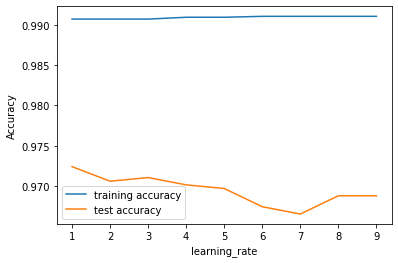

In [ ]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [ ]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

[15:10:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.987
XGBoost Classifier : Accuracy on test Data: 0.969

XGBoost Classifier : f1_score on training Data: 0.988
XGBoost Classifier : f1_score on test Data: 0.973

XGBoost Classifier : Recall on training Data: 0.993
XGBoost Classifier : Recall on test Data: 0.993

XGBoost Classifier : precision on training Data: 0.984
XGBoost Classifier : precision on test Data: 0.984


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [ ]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.987
Multi-layer Perceptron : Accuracy on test Data: 0.971

Multi-layer Perceptron : f1_score on training Data: 0.989
Multi-layer Perceptron : f1_score on test Data: 0.989

Multi-layer Perceptron : Recall on training Data: 0.992
Multi-layer Perceptron : Recall on test Data: 0.982

Multi-layer Perceptron : precision on training Data: 0.985
Multi-layer Perceptron : precision on test Data: 0.967


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [ ]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.934,0.941,0.943,0.927
1,K-Nearest Neighbors,0.956,0.961,0.991,0.989
2,Support Vector Machine,0.964,0.968,0.980,0.965
3,Naive Bayes Classifier,0.605,0.454,0.292,0.997
4,Decision Tree,0.961,0.965,0.991,0.993
5,Random Forest,0.967,0.970,0.992,0.991
6,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
7,CatBoost Classifier,0.972,0.975,0.994,0.989
8,XGBoost Classifier,0.969,0.973,0.993,0.984
9,Multi-layer Perceptron,0.971,0.974,0.992,0.985


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.974,0.977,0.994,0.986
1,CatBoost Classifier,0.972,0.975,0.994,0.989
2,Multi-layer Perceptron,0.971,0.974,0.992,0.985
3,XGBoost Classifier,0.969,0.973,0.993,0.984
4,Random Forest,0.967,0.970,0.992,0.991
5,Support Vector Machine,0.964,0.968,0.980,0.965
6,Decision Tree,0.961,0.965,0.991,0.993
7,K-Nearest Neighbors,0.956,0.961,0.991,0.989
8,Logistic Regression,0.934,0.941,0.943,0.927
9,Naive Bayes Classifier,0.605,0.454,0.292,0.997


## Storing Best Model

In [ ]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
import pickle

# dump information to that file
pickle.dump(gbc, open('pickle/model.pkl', 'wb'))

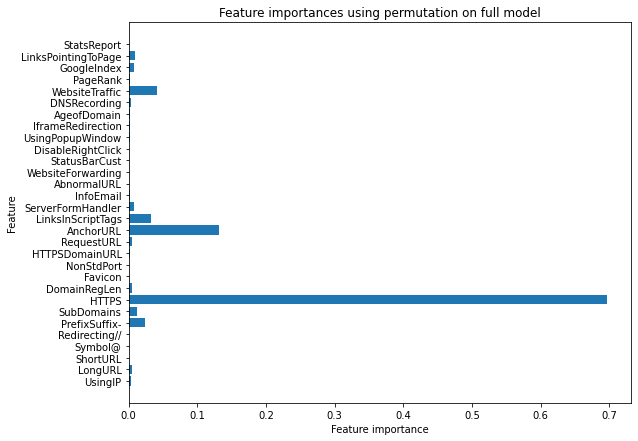

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## 7. Conclusion

1. The final take away form this project is to explore various machine learning models, perform Exploratory Data Analysis on phishing dataset and understanding their features. 
2. Creating this notebook helped me to learn a lot about the features affecting the models to detect whether URL is safe or not, also I came to know how to tuned model and how they affect the model performance.
3. The final conclusion on the Phishing dataset is that the some feature like "HTTTPS", "AnchorURL", "WebsiteTraffic" have more importance to classify URL is phishing URL or not. 
4. Gradient Boosting Classifier currectly classify URL upto 97.4% respective classes and hence reduces the chance of malicious attachments.
